From Greg Burnham, it had to happen eventually, at long last and not a moment too soon, The Riddler meets “Game of Thrones”:

At a pivotal moment in an epic battle between the living and the dead, the Night King, head of the army of the dead, raises all the fallen (formerly) living soldiers to join his ranks. This ability obviously presents a huge military advantage, but how big an advantage exactly?

Forget the Battle of Winterfell and model our battle as follows. Each army lines up single file, facing the other army. One soldier steps forward from each line and the pair duels — half the time the living soldier wins, half the time the dead soldier wins. If the living soldier wins, he goes to the back of his army’s line, and the dead soldier is out (the living army uses dragonglass weapons, so the dead soldier is dead forever this time). If the dead soldier wins, he goes to the back of their army’s line, but this time the (formerly) living soldier joins him there. (Reanimation is instantaneous for this Night King.) The battle continues until one army is entirely eliminated.

What starting sizes of the armies, living and dead, give each army a 50-50 chance of winning?

In [28]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from math import *

In [46]:
def move(d, a):
    return (d+1, a-1) if np.random.rand() > 0.5 else (d-1, a)

def play_round(d, a):
    while d > 0 and a > 0:
        d, a = move(d, a)
    return a > 0

In [90]:
def play_round(d, a):
    if a == 0 or d == 0:
        return a > 0
    
    while True:
        for r in np.random.randint(2, size=2*max(d,a)+2):
            if r:
                d, a = d+1, a-1
                if a == 0:
                    return False
            else:
                d = d-1
                if d == 0:
                    return True

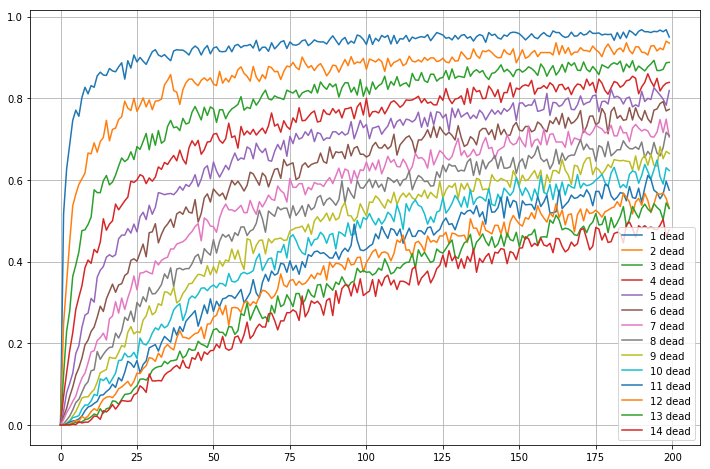

CPU times: user 53.5 s, sys: 220 ms, total: 53.7 s
Wall time: 54.1 s


In [91]:
%%time

plt.figure(figsize=(12,8))
a_counts, d_counts = range(200), range(1,15)
for d_count in d_counts:
    winners = [np.mean([play_round(d_count, a_count) for _ in range(1000)]) for a_count in a_counts]
    plt.plot(a_counts, winners, label = f'{d_count} dead')
plt.grid()
plt.legend(loc='best')
plt.show()

In [97]:
memo = {}
def prob_living_win_dp(d, a):
    if d == 0:
        return 1
    if a == 0:
        return 0
    if (d,a) in memo:
        return memo[(d,a)]
    
    p = (prob_living_win_dp(d+1, a-1) + prob_living_win_dp(d-1, a)) / 2
    memo[(d,a)] = p
    return p

In [100]:
%%time

print(prob_living_win_dp(200,200))

1.5873374270260175e-16
CPU times: user 94.5 ms, sys: 10.7 ms, total: 105 ms
Wall time: 106 ms


In [141]:
%%time

print(prob_living_win_dp(20,400))

0.48466449522717037
CPU times: user 66.7 ms, sys: 7.22 ms, total: 73.9 ms
Wall time: 85.1 ms


In [170]:
%%time
for i in range(21,101):
    print(prob_living_win_dp(i,i*i))

0.4844330516523059
0.48422142373868005
0.48402717596063405
0.48384825543851295
0.48368291978105765
0.48352968062965723
0.4833872590660545
0.4832545500789577
0.48313059401650293
0.483014553475577
0.48290569445885556
0.4828033709087651
0.48270701193363313
0.4826161111953141
0.482530218043726
0.48244893007209183
0.482371886834418
0.4822987645190686
0.48222927141301575
0.4821631440232407
0.48210014374690124
0.48204005400182953
0.4819826777448325
0.48192783531803224
0.4818753625737772
0.4818251092369943
0.48177693747064565
0.48173072061551353
0.48168634208009664
0.48164369436017535
0.48160267817071645
0.48156320167538974
0.48152517980113135


RecursionError: maximum recursion depth exceeded in comparison

In [171]:
n = max(map(max, memo.keys()))+1
p = np.zeros((n,n))
for d,a in memo:
    p[d,a] = memo[(d,a)]

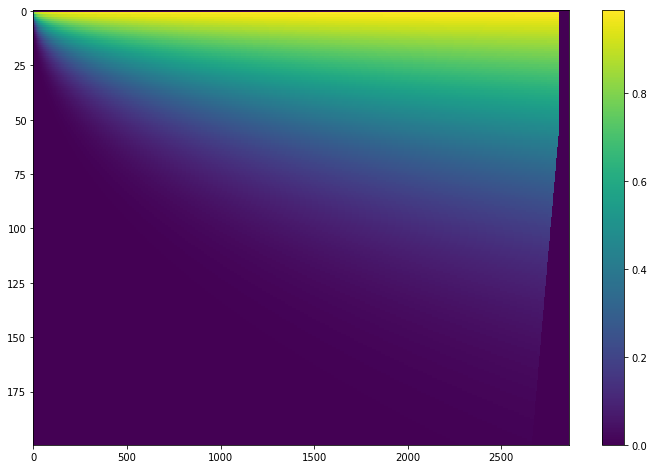

In [177]:
plt.figure(figsize=(12,8))
plt.imshow(p[:200,:], aspect='auto')
plt.colorbar()
plt.show()

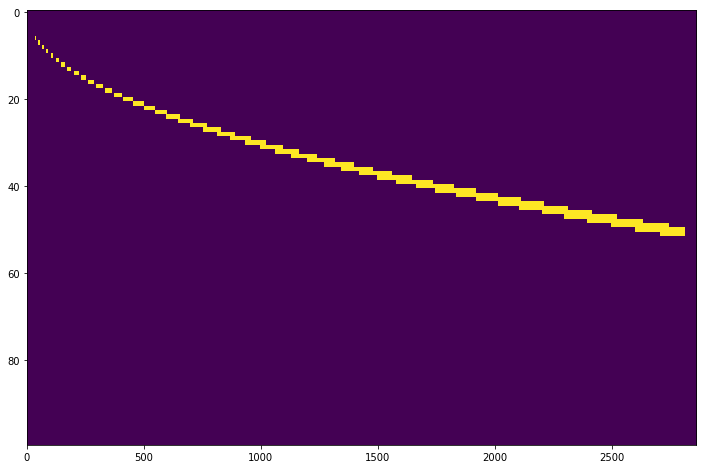

In [173]:
plt.figure(figsize=(12,8))
plt.imshow(np.abs(p[:100,:]-0.5)<1e-2, aspect='auto')
plt.show()